Este es el EDA solicitado para el Modelo de Machine Learning.

Dadas las características de los datos con que se cuentan(*), el modelo de recomendación estará basado sobre un Filtro basado en contenido. El EDA se realiza desde esa premisa.
(*) No contamos con preferencias de los usuarios por lo que no utilizaremos una matriz de utilidad.

In [48]:
# Ambiente
# IMPORTANTE! El valor de la siguiente variable de ambiente debe modificarse al del
# directorio raiz en donde usted haya desplegado el proyecto
%env DIRECTORIO_RAIZ=/com.docker.devenvironments.code

env: DIRECTORIO_RAIZ=/com.docker.devenvironments.code


In [49]:
# Imports
import os
import pandas as pd
import etl_flow as etlflow
from matplotlib import pyplot as plt
import seaborn as sns

EDA del archivo de peliculas crudo

In [50]:
# Obtengo el directorio raiz desde la variable de entorno DIRECTORIO_RAIZ
dir_raiz = os.getenv("DIRECTORIO_RAIZ")

# Movies
# ======
archivo = os.path.join(dir_raiz, 'src/movies_dataset.csv_no')
movies_df = pd.read_csv(archivo)

# Me quedo con las columnas utiles segun el criterio de evaluacion
columns_to_store = ['belongs_to_collection', 'budget', 'genres', 'id',
       'original_language', 'overview',
       'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count']
m_df = movies_df[columns_to_store]

# Libero espacio de memoria (Requerido por Render)
del movies_df

# Drops de registros
m_df.dropna(subset=['production_companies'], inplace=True)
m_df.dropna(subset=['spoken_languages'], inplace=True)
m_df.dropna(subset=['release_date'], inplace=True)

/tmp/ipykernel_36602/1140328631.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv(archivo)


Foco de analisis en los siguientes campos
# belongs_to_collection
# genres
# production_companies
# production_countries
# spoken_languages

In [51]:
m_df[['id', 'belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     45376 non-null  object
 1   belongs_to_collection  4488 non-null   object
 2   genres                 45376 non-null  object
 3   production_companies   45376 non-null  object
 4   production_countries   45376 non-null  object
 5   spoken_languages       45376 non-null  object
dtypes: object(6)
memory usage: 2.4+ MB


El campo belongs_to_collection no es representativo en la muestra por lo que ni este ni el campo collection_name en el dataframe preprocesado será utilizado en el modelo

EDA del archivo de peliculas preprocesado

In [52]:
m_df = etlflow.obtener_df_preprocesado(nombre_df='m_df')

In [53]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   budget               45376 non-null  float64
 1   id                   45376 non-null  int64  
 2   original_language    45365 non-null  object 
 3   overview             44435 non-null  object 
 4   popularity           45376 non-null  float64
 5   release_date         45376 non-null  object 
 6   revenue              45376 non-null  float64
 7   runtime              45130 non-null  float64
 8   status               45296 non-null  object 
 9   tagline              20398 non-null  object 
 10  title                45376 non-null  object 
 11  vote_average         45376 non-null  float64
 12  vote_count           45376 non-null  float64
 13  release_year         45376 non-null  int64  
 14  release_month        45376 non-null  int64  
 15  release_day_of_week  45376 non-null 

# Tagline y collection_name
Estas columnas no son representativas frente al resto de los datos. Las elimino

In [54]:
# Analizo las columnas numericas
m_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month,return
count,4.537600e+04,45376.000000,45376.000000,4.537600e+04,45130.000000,45376.000000,45376.000000,45376.000000,45376.000000,4.537600e+04
mean,4.232604e+06,108027.103094,2.926458,1.123010e+07,94.181675,5.624070,110.096439,1991.881193,6.459075,6.600428e+02
std,1.743986e+07,112168.377996,6.009672,6.438996e+07,38.341059,1.915423,491.742894,24.055360,3.628160,7.469329e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,1.000000,0.000000e+00
25%,0.000000e+00,26385.750000,0.388840,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,3.000000,0.000000e+00
50%,0.000000e+00,59857.500000,1.130454,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,7.000000,0.000000e+00
75%,0.000000e+00,156533.500000,3.691695,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,10.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,12.000000,1.239638e+07


Nota: El punto se usa como separador de miles en este Markdown

# Budget
Valores muy dispersos entre 0 y 380.000.000

# Popularity
Con desviacion standard muy lejos de la media. Parece haber outliers por encima del 3er cuartil (P.Ej. 547)

# Revenue
Valores muy dispersos entre 0 y 2.787.965.000

# Runtime (Minutos de duracion de la pelicula)
Aunque hay outliers parecen razonables los valores

# Vote_average
Los valores parecen razonables

# Vote_count
Los valores parecen razonables, aunque algunas peliculas tienen muchisimos votos

# Release_year
Aunque la misma es categórica ordinal, es probable que sea util para segmentar por "epoca"

# Release_month
Aunque la misma es categórica ordinal, es probable que sea util para segmentar por "momento del año para el estreno"

# Return (Retorno frente a la inversion)
Valores muy dispersos

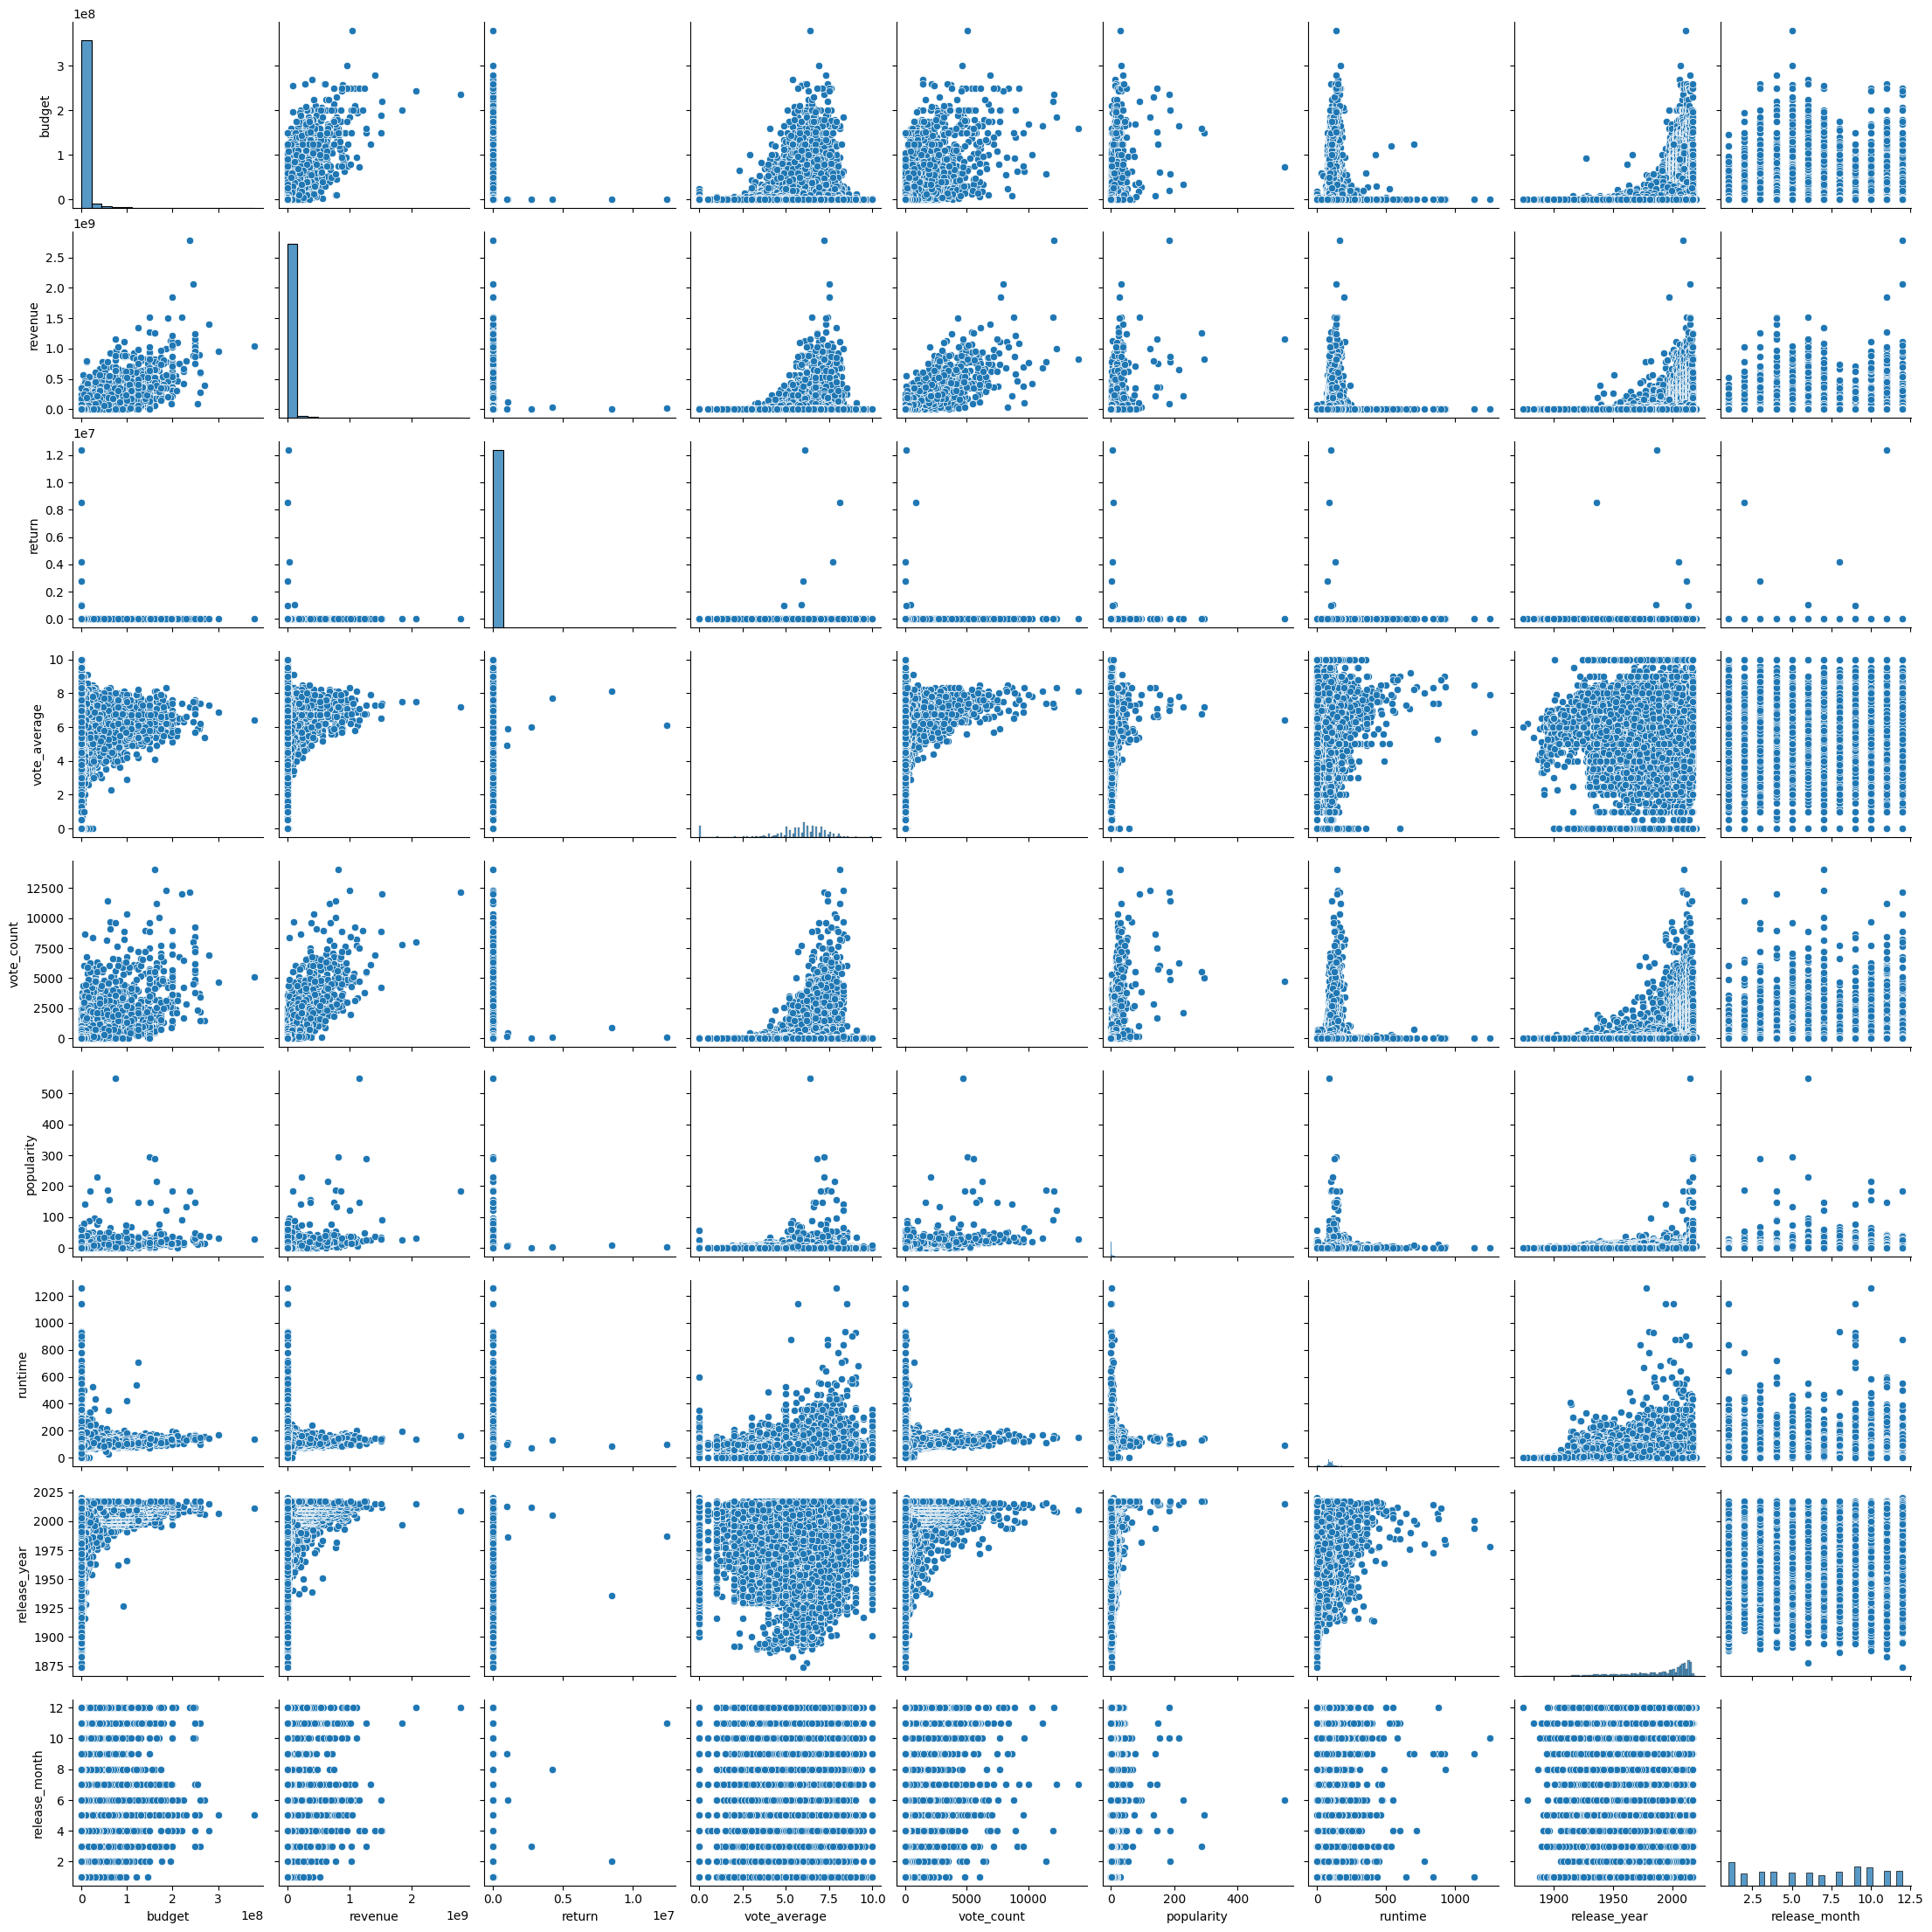

In [55]:
sns.pairplot(data=m_df[['budget', 'revenue', 'return', 'vote_average', 'vote_count', 'popularity', 'runtime', 'release_year', 'release_month']])

Del pair plot anterior, obtenemos los siguientes insights

# Mes de estrenos
Enero parece ser el mes de estrenos por excelencia (Coincide con las vacaciones de invierno en el hemisferio Norte).
Le siguen Septiembre y Octubre

# Budgets
Los presupuestos más abultados se dan a partir de 1975 y usualmente se da en peliculas de menos de 200 minutos de duración.
No parece existir una relación entre presupuesto y popularidad. Sin embargo a la hora del promedio de votos, un presupuesto más alto suele asegurar un promedio de votos mejor.

# Revenue
No parece existir una relación entre revenue y popularidad. Sin embargo a la hora del promedio de votos, un revenue más alto suele asegurar un promedio de votos mejor.

# Votos
Parece existir una correlación fuerte entre la cantidad de votos y el promedio de votos. A mayor cantidad de votos, mayor promedio de voto asegurado.
No parece existir una correlación con popularity.

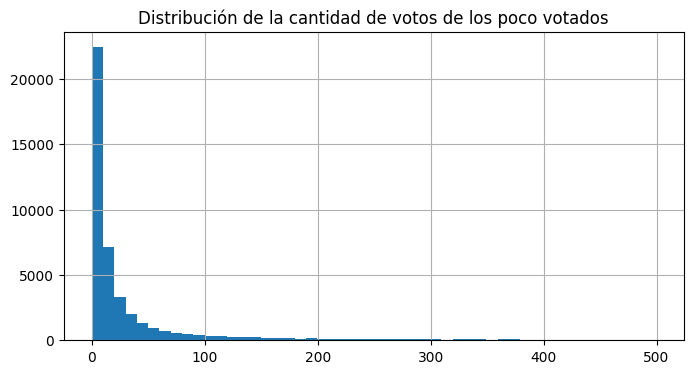

In [56]:
plt.figure(figsize = (8,4))

m_df.vote_count[m_df.vote_count<500].hist(log=False, bins=50)
plt.title('Distribución de la cantidad de votos de los poco votados')

plt.show()

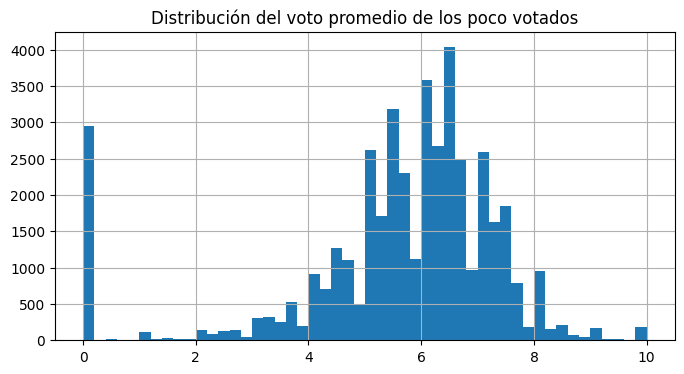

In [57]:
plt.figure(figsize = (8,4))

m_df.vote_average[m_df.vote_count<500].hist(log=False, bins=50)
plt.title('Distribución del voto promedio de los poco votados')

plt.show()

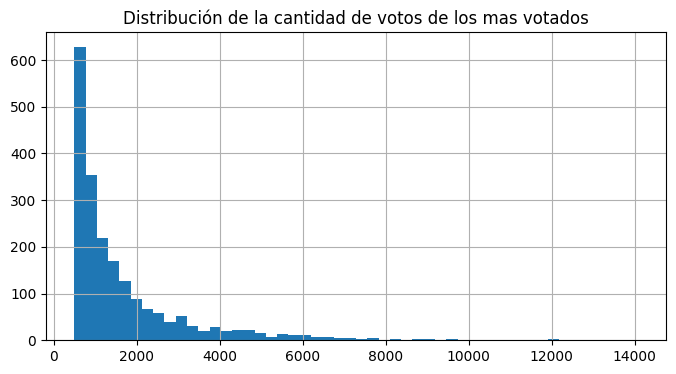

In [58]:
plt.figure(figsize = (8,4))

m_df.vote_count[m_df.vote_count>=500].hist(log=False, bins=50)
plt.title('Distribución de la cantidad de votos de los mas votados')

plt.show()

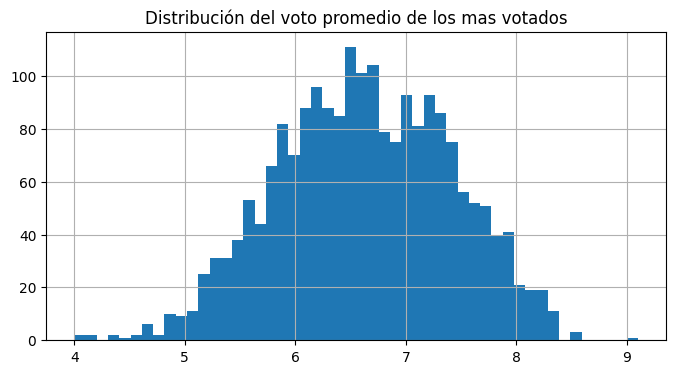

In [59]:
plt.figure(figsize = (8,4))

m_df.vote_average[m_df.vote_count>=500].hist(log=False, bins=50)
plt.title('Distribución del voto promedio de los mas votados')

plt.show()

Las distribuciones del voto promedio son mas estables en los más votados (500 votos o más). En el caso de los menos votados hay casi 3000 registros con valor 0

Procedo con el analisis de las variables categoricas

In [60]:
m_df[['title', 'overview', 'status']]

,title,overview,status
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released
1,Jumanji,When siblings Judy and Peter discover an encha...,Released
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,Released
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Released
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,Released
...,...,...,...
45371,Robin Hood,"Yet another version of the classic epic, with ...",Released
45372,Century of Birthing,An artist struggles to finish his work while a...,Released
45373,Betrayal,"When one of her hits goes wrong, a professiona...",Released
45374,Satan Triumphant,"In a small town live two brothers, one a minis...",Released


In [61]:
m_df['title'].value_counts() # Los clasicos suelen tener mas de una version. P.Ej. Cinderella

title
Cinderella              11
Alice in Wonderland      9
Hamlet                   9
Les Misérables           8
Beauty and the Beast     8
                        ..
Lampaansyöjät            1
Animal Kingdom           1
The Exploding Girl       1
Prodigal Sons            1
Queerama                 1
Name: count, Length: 42196, dtype: int64

In [62]:
m_df[m_df['title'] == 'Cinderella']

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,release_year,release_month,release_day_of_week,return,collection_name
991,2900000.0,11224,en,Cinderella has faith her dreams of a better li...,14.436858,1950-03-04,263591415.0,74.0,Released,The greatest love story ever told.,Cinderella,6.8,1760.0,1950,3,Saturday,90.893591,Cinderella Collection
13071,0.0,42884,en,Updated version of the classic Rodgers and Ham...,2.102013,1997-11-02,0.0,88.0,Released,NaN,Cinderella,6.1,28.0,1997,11,Sunday,0.000000,NaN
23480,0.0,92349,en,Based on Charles Perrault's fairy tale: Cinder...,0.361288,1914-12-28,0.0,52.0,Released,NaN,Cinderella,5.4,7.0,1914,12,Monday,0.000000,NaN
23491,0.0,105875,en,"Cinderella, the beautiful and kind-hearted rag...",2.154873,2002-08-06,0.0,48.0,Released,The version children love!,Cinderella,6.0,2.0,2002,8,Tuesday,0.000000,NaN
28360,0.0,261985,en,Once upon a time in post-war Rome: 13-year old...,0.987462,2011-10-30,0.0,180.0,Released,NaN,Cinderella,5.3,9.0,2011,10,Sunday,0.000000,NaN
28633,95000000.0,150689,en,"When her father unexpectedly passes away, youn...",19.801128,2015-03-12,543514353.0,105.0,Released,Midnight is just the beginning.,Cinderella,6.7,2426.0,2015,3,Thursday,5.721204,NaN
34212,0.0,42651,ru,"Based on a classic fairytale ""Cinderella"" bril...",0.486073,1947-11-28,0.0,80.0,Released,NaN,Cinderella,4.8,5.0,1947,11,Friday,0.000000,NaN
35546,0.0,44459,en,The first of three TV-versions of the classic ...,0.209552,1957-03-31,0.0,77.0,Released,NaN,Cinderella,5.9,5.0,1957,3,Sunday,0.000000,NaN
35548,0.0,289673,en,Cinderella (named Zezolla) and her family live...,1.085134,2000-01-01,0.0,90.0,Released,NaN,Cinderella,5.6,5.0,2000,1,Saturday,0.000000,NaN
41007,0.0,114108,fr,A fairy godmother magically turns Cinderella's...,1.301063,1899-10-01,0.0,5.0,Released,NaN,Cinderella,5.5,19.0,1899,10,Sunday,0.000000,NaN


In [45]:
m_df['overview'].value_counts() # No hay muchos casos sin overview

overview
No overview found.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                133
No Overview                                                                                                                                                                                                                                                                                                                                                                                                              

In [46]:
m_df['status'].value_counts() # La mayoria esta en estado Released

status
Released           44936
Rumored              230
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: count, dtype: int64

Los siguientes son recursos que he buscado para definir como implementar el modelo de machine learning
https://towardsdatascience.com/hands-on-content-based-recommender-system-using-python-1d643bf314e4


# IMPORTANTE
A partir de la clase de consulta del viernes 9 de Junio, cambio el enfoque:
.- Uso title y overview como información para armar el modelo de recomendación
.- Me guio con https://medium.com/web-mining-is688-spring-2021/cosine-similarity-and-tfidf-c2a7079e13fa